In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("17_student_performance_estimation.csv")
df.head()

,student_id,study_hours,absences,school_support,final_grade
0,S0001,28.9,8,no,30
1,S0002,14.8,10,yes,100
2,S0003,10.5,7,yes,87
3,S0004,18.4,7,yes,47
4,S0005,15.3,1,no,82


In [3]:
df.drop(columns=["student_id"], inplace=True)#this column not required for modelling

In [4]:
print(df['school_support'].value_counts())

school_support
yes    509
no     491
Name: count, dtype: int64


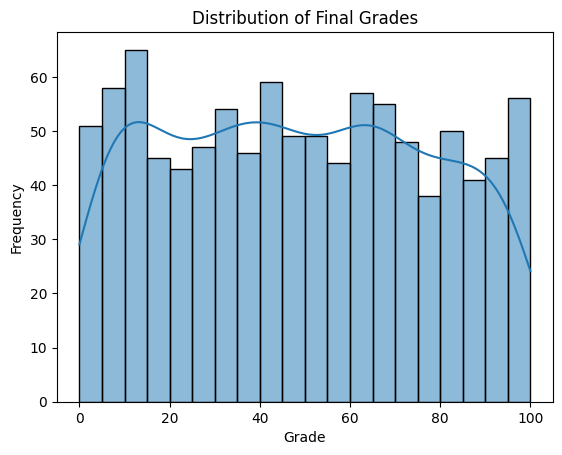

In [5]:
sns.histplot(df['final_grade'], bins=20, kde=True)
plt.title("Distribution of Final Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
df['school_support'] = LabelEncoder().fit_transform(df['school_support'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
X = df.drop(columns=["final_grade"])
y = df["final_grade"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

from sklearn.ensemble import RandomForestRegressor

#  Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [14]:

rf_preds = rf_model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"\n Random Forest Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


 Random Forest Results:
Mean Squared Error: 840.58
R² Score: -0.01


In [19]:
#testing some sample input
import pandas as pd

sample_data = pd.DataFrame([{
    'study_hours': 6.5,
  
    'absences': 2,
    'school_support': 1
}])

predicted_grade = rf_model.predict(sample_data)

print(f"📘 Predicted Final Grade: {predicted_grade[0]:.2f}")


📘 Predicted Final Grade: 52.94


In [18]:
print(X_train.columns)


Index(['study_hours', 'absences', 'school_support'], dtype='object')


In [20]:
df.head()

,study_hours,absences,school_support,final_grade
0,28.9,8,0,30
1,14.8,10,1,100
2,10.5,7,1,87
3,18.4,7,1,47
4,15.3,1,0,82
